### LASSO and Cross Validation

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'/Users/Downloads/data1.xlsx')

In [3]:
training1 = df[df['Date'] <= '12/31/97']
training1 = training1.reset_index(drop=True)
dates1 = training1['Date']
del training1['Date']

In [4]:
training2 = df[(df['Date'] >'12/31/97') & (df['Date'] <= '12/31/02' )]
training2 = training2.reset_index(drop=True)
dates2 = training2['Date']
del training2['Date']

In [5]:
test = df[df['Date'] > '12/31/02']
dates_test = test['Date']
test = test.reset_index(drop=True)
del test['Date']

In [6]:
pca = PCA(.95)
principalComponents = pca.fit_transform(training1)
principalDf = pd.DataFrame(data = principalComponents)

In [7]:
loadings = pd.DataFrame(pca.components_)

In [13]:
pca = PCA(n_components=5)
principalComponents = pca.fit(training1)
results = principalComponents.transform(training2)

In [14]:
result = pd.DataFrame(results)

In [15]:
depth = list(result.values)

In [16]:
res = []
for i in range(0, len(depth)- 3):
    arr = []
    for x in range(0,3):
        arr2 = np.concatenate((arr, depth[i+x]))
        arr = arr2 
    res.append(arr2)

In [24]:
output = pd.DataFrame(res)
stackedDf =pd.DataFrame()
for i in range(0,30):
    stackedDf = stackedDf.append(output, ignore_index = True)

In [25]:
output_c=pd.DataFrame(output)
output_c['Constant']=1

In [26]:
big=[]
empty=pd.DataFrame(np.zeros((1253,464)))
big=pd.concat([output_c,empty], ignore_index=True, axis=1)

for i in range(1,30):
    temp=pd.DataFrame()
    empty1=pd.DataFrame(np.zeros((1253,16*i)))
    temp=pd.concat([empty1,output_c],ignore_index=True, axis=1)
    empty2=pd.DataFrame(np.zeros((1253,(29-i)*16)))
    temp=pd.concat([temp,empty2],ignore_index=True, axis=1)
    big=big.append(temp, ignore_index=True)

In [28]:
yValue = [[]]
for key, value in training2.iteritems():
    yValue.append(value)
yValue.pop(0)

[]

In [29]:
lst = []
mid = []
for i in range(0,30):
    lst = np.concatenate((mid, yValue[i][-1253:]))
    mid = lst

In [30]:
big.insert(0, "yValue", mid)

In [33]:
X_train=big.drop(['yValue'],axis=1)
X_train=pd.concat([X_train,stackedDf],ignore_index=True, axis=1)
Y_train=pd.DataFrame(mid)

In [39]:
lasso = linear_model.Lasso(normalize=True)
lasso.fit(X=X_train, y=Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
CV = LassoCV(cv=5, n_alphas=10)
CV.fit(X=X_train, y=Y_train)

/Users/shishiragrawal/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=10, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [41]:
mse_=CV.mse_path_.mean(axis=1)
print('Most optimal lambda :', CV.alpha_)

('Most optimal lambda :', 6.422481011341182e-07)


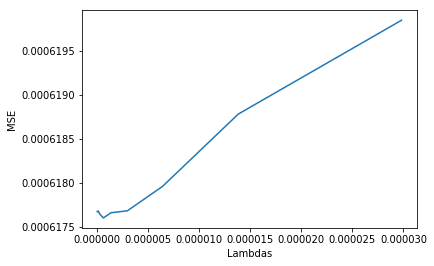

In [42]:
plt.plot(CV.alphas_, mse_)
plt.xlabel('Lambdas')
plt.ylabel('MSE')
plt.show()

In [43]:
lasso = linear_model.Lasso(alpha=CV.alpha_, normalize=True)
lasso.fit(X=X_train, y=Y_train)

Lasso(alpha=6.422481011341182e-07, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## Trading Strategy

In [44]:
pca = PCA(n_components=5)
principalComponents = pca.fit(training1)
results_test = principalComponents.transform(test)
result = pd.DataFrame(results_test)
depth = list(result.values)

In [45]:
res = []
for i in range(0, len(depth)- 3):
    arr = []
    for x in range(0,3):
        arr2 = np.concatenate((arr, depth[i+x]))
        arr = arr2 
    res.append(arr2)

In [46]:
output = pd.DataFrame(res)
stackedDf =pd.DataFrame()
for i in range(0,30):
    stackedDf = stackedDf.append(output, ignore_index = True)

In [47]:
output_c=pd.DataFrame(output)
output_c['Constant']=1

In [48]:
big=[]
empty=pd.DataFrame(np.zeros((len(output_c),464)))
big=pd.concat([output_c,empty], ignore_index=True, axis=1)

for i in range(1,30):
    temp=pd.DataFrame()
    empty1=pd.DataFrame(np.zeros((len(output_c),16*i)))
    temp=pd.concat([empty1,output_c],ignore_index=True, axis=1)
    empty2=pd.DataFrame(np.zeros((len(output_c),(29-i)*16)))
    temp=pd.concat([temp,empty2],ignore_index=True, axis=1)
    big=big.append(temp, ignore_index=True)

In [49]:
yValue = [[]]
for key, value in test.iteritems():
    yValue.append(value)
yValue.pop(0)

[]

In [51]:
lst = []
y_test_true = []
for i in range(0,30):
    lst = np.concatenate((y_test_true, yValue[i][-1530:]))
    y_test_true = lst

In [52]:
X_test=pd.concat([big,stackedDf],ignore_index=True, axis=1)
Y_test_true=pd.DataFrame(y_test_true)

In [53]:
Y_test=lasso.predict(X_test)

In [54]:
vec=Y_test
vecdf=[]
for i in range(0,1530):
    temp=vec[::1530,]
    vecdf.append(temp)
    vec=np.delete(vec,0)
vec_df_results=pd.DataFrame(vecdf)

In [56]:
vec=y_test_true
vecdf=[]
for i in range(0,1530):
    temp=vec[::1530,]
    vecdf.append(temp)
    vec=np.delete(vec,0)
vec_df_true=pd.DataFrame(vecdf)

In [57]:
vec_df_results.columns=test.columns.values

In [61]:
vec_df_true.columns=test.columns.values

In [62]:
df2 = vec_df_results
nlargest = 5
order = np.argsort(-df2.values, axis=1)[:, :nlargest]
result2 = pd.DataFrame(df2.columns[order], 
                      columns=['top{}'.format(i) for i in range(1, nlargest+1)],
                      index=df2.index)

In [63]:
df2 = vec_df_results
nSmallest = 5
order = np.argsort(df2.values, axis=1)[:, :nSmallest]
result3 = pd.DataFrame(df2.columns[order], 
                      columns=['bottom{}'.format(i) for i in range(1, nSmallest+1)],
                      index=df2.index)

In [64]:
resulting=pd.concat([result2,result3], axis=1)
resulting.head(5)

,top1,top2,top3,top4,top5,bottom1,bottom2,bottom3,bottom4,bottom5
0,AA,DIS,AXP,MCD,GM,INTC,MRK,BA,T,MSFT
1,DIS,HPQ,VZ,T,INTC,C,UTX,AXP,KO,PG
2,PFE,GM,INTC,T,MCD,DIS,BA,C,MMM,AXP
3,C,AXP,DIS,PG,AA,INTC,T,VZ,PFE,UTX
4,BA,AXP,VZ,MRK,T,MMM,PG,MCD,DD,XOM


In [65]:
pnl=[]
port=100
for i in range(0,1530):
    perstock=0.1*port
    max_5=np.exp(np.array(vec_df_true.loc[i,np.array(result2.iloc[i])]))-1
    min_5=np.exp(np.array(vec_df_true.loc[i,np.array(result3.iloc[i])]))-1
    daily_p=0
    daily_p=sum(perstock*max_5)-sum(perstock*min_5)
    port=port+daily_p
    pnl.append(port)

In [66]:
print('Final portfolio value',port)

('Final portfolio value', 171.30529358316193)


/Users/shishiragrawal/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


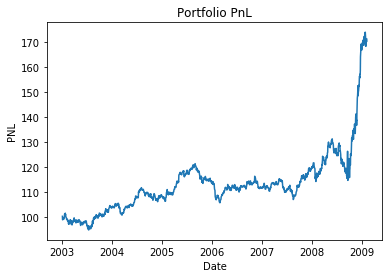

In [67]:
dates_test1=np.delete(np.array(dates_test),[0,1,2])
plt.plot(dates_test1,pnl)
plt.title('Portfolio PnL')
plt.ylabel('PNL')
plt.xlabel('Date')
plt.show()